In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier

## The problem

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Input: 'sepal length', 'sepal width', 'petal length', 'petal width'

Classificate an Iris flower as 'setosa' or 'versicolor' or 'virginica' (the target classes)

## Prepare the data

### Load the data

In [53]:
# Load the data
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
print(iris.data.shape)
print(iris.data[0:5])
print(iris.feature_names)
print(iris.target.shape)
print(iris.target[:5])
print(np.unique(iris.target))

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
[0 0 0 0 0]
[0 1 2]


In [55]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Get insight of the data

In [56]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [57]:
# How many are different target values
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### Visuilize data

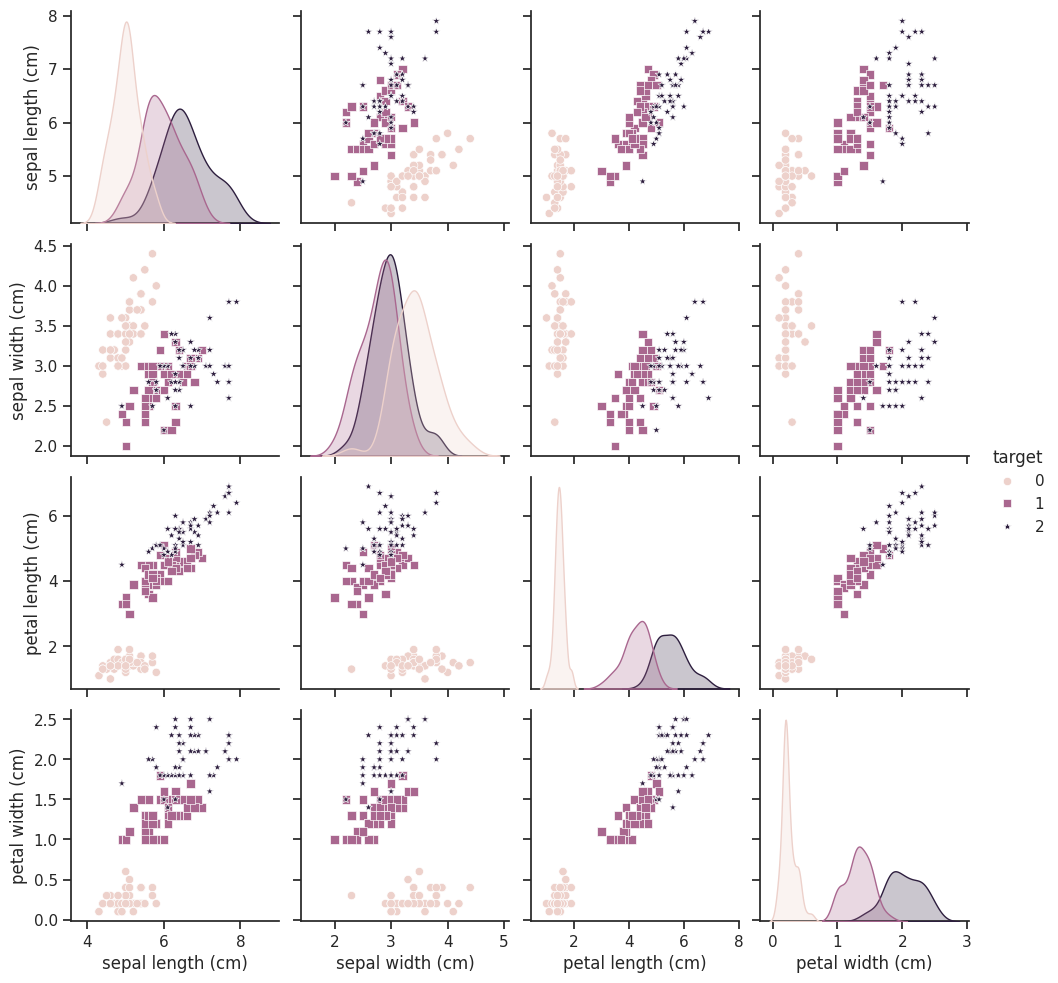

In [58]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df,
                 hue = 'target',
                 vars=['sepal length (cm)',
                       'sepal width (cm)',
                       'petal length (cm)',
                       'petal width (cm)',
                      ],
                 markers=['o','s','*'])

In [59]:
# create map target values to categories:
# iris_type_map = {
#     0:'Iris-Setosa',
#     1:'Iris-Versicolour',
#     2:'Iris-Virginica'
# }

iris_type_map = ['Iris-Setosa', 'Iris-Versicolour','Iris-Virginica']

answer = 2
print(iris_type_map[answer])

Iris-Virginica


### Separate train/test data

In [60]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
X_train, X_test = train_test_split(df.iloc[:,:4])
y_train, y_test = train_test_split(df.iloc[:,4])

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [63]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
137,6.4,3.1,5.5,1.8
113,5.7,2.5,5.0,2.0
99,5.7,2.8,4.1,1.3
45,4.8,3.0,1.4,0.3


## Train the model

In [64]:
# the default value for k is 5, but let set it to 1:
knn = KNeighborsClassifier(n_neighbors=5)

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Test the model

In [66]:
y_predicted = knn.predict(X_test)

## Evaluate the model

In [67]:
# check the accuracy of our model:
score = knn.score(X_test, y_test)
score

0.2894736842105263

In [70]:
from sklearn.model_selection import cross_val_score

X = df.iloc[:,:4]
y = df.iloc[:,4]
scores = cross_val_score(knn, X, y, cv=10)
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [69]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.58      0.39        12
           1       0.50      0.20      0.29        15
           2       0.12      0.09      0.11        11

    accuracy                           0.29        38
   macro avg       0.31      0.29      0.26        38
weighted avg       0.33      0.29      0.27        38

